In [67]:
import numpy as np
import pandas as pd
from scipy import signal
import matplotlib.pyplot as plt
from scipy.io import wavfile
from scipy.integrate import simps
from scipy.fft import fftshift
from tsfel.feature_extraction import features as tsfelf

In [7]:
from os import listdir
from os.path import isfile, join


In [91]:
def bpf(arr, fs, lf, hf, order):
    wbut = [lf, hf]
    bbut, abut = signal.butter(order, wbut, btype ='bandpass', fs = fs)

    return signal.filtfilt(bbut, abut, arr)

def hpf(arr, fs, lf, order):
    wbut = lf
    bbut, abut = signal.butter(order, wbut, btype ='highpass', fs =fs)

    return signal.filtfilt(bbut, abut, arr)


In [19]:
mypath = 'C:\\Users\\Owner\\Downloads\\CapstoneData\\10_Nov_2021_timestamps'
timestamps = [f for f in listdir(mypath) if isfile(join(mypath, f))]

timestamps

['start_10_11_2021_14_49_48_gravel.csv',
 'start_10_11_2021_14_51_42_gravel.csv',
 'start_10_11_2021_14_54_02_wet_asphalt.csv',
 'start_10_11_2021_14_59_48_wet_asphalt.csv',
 'start_10_11_2021_15_04_50_gravel.csv',
 'start_10_11_2021_15_08_28_wet_asphalt.csv',
 'start_10_11_2021_15_13_38_wet_asphalt.csv',
 'stop_10_11_2021_14_49_57_gravel.csv',
 'stop_10_11_2021_14_53_28_gravel.csv',
 'stop_10_11_2021_14_59_34_wet_asphalt.csv',
 'stop_10_11_2021_15_04_45_wet_asphalt.csv',
 'stop_10_11_2021_15_08_07_gravel.csv',
 'stop_10_11_2021_15_11_24_wet_asphalt.csv',
 'stop_10_11_2021_15_18_54_wet_asphalt.csv']

In [27]:

word = "gravel"
word2 ="wet_asphalt"

gravelstamps = []
wetasphaltstamps = []

for i in range(len(timestamps)):
    sentence = timestamps[i]
    if word in sentence.lower():
        gravelstamps.append(sentence)
    if word2 in sentence.lower():
        wetasphaltstamps.append(sentence)
        
gravelstamps

['start_10_11_2021_14_49_48_gravel.csv',
 'start_10_11_2021_14_51_42_gravel.csv',
 'start_10_11_2021_15_04_50_gravel.csv',
 'stop_10_11_2021_14_49_57_gravel.csv',
 'stop_10_11_2021_14_53_28_gravel.csv',
 'stop_10_11_2021_15_08_07_gravel.csv']

In [40]:
import datetime

date_time_str = '10_11_2021_14_49_48'
#date_time_obj = datetime.datetime.strptime(date_time_str, '%Y-%m-%d %H:%M:%S.%f')


date_time_obj = datetime.datetime.strptime(date_time_str, '%d-%m-%Y %H:%M:%S.%f')
print('Date:', date_time_obj.date())
print('Time:', date_time_obj.time())
print('Date-time:', date_time_obj)

ValueError: time data '10_11_2021_14_49_48' does not match format '%d-%m-%Y %H:%M:%S'

In [32]:
stamp = gravelstamps[0][17:25]

In [41]:
gravelstamps

['start_10_11_2021_14_49_48_gravel.csv',
 'start_10_11_2021_14_51_42_gravel.csv',
 'start_10_11_2021_15_04_50_gravel.csv',
 'stop_10_11_2021_14_49_57_gravel.csv',
 'stop_10_11_2021_14_53_28_gravel.csv',
 'stop_10_11_2021_15_08_07_gravel.csv']

In [43]:
wetasphaltstamps

['start_10_11_2021_14_54_02_wet_asphalt.csv',
 'start_10_11_2021_14_59_48_wet_asphalt.csv',
 'start_10_11_2021_15_08_28_wet_asphalt.csv',
 'start_10_11_2021_15_13_38_wet_asphalt.csv',
 'stop_10_11_2021_14_59_34_wet_asphalt.csv',
 'stop_10_11_2021_15_04_45_wet_asphalt.csv',
 'stop_10_11_2021_15_11_24_wet_asphalt.csv',
 'stop_10_11_2021_15_18_54_wet_asphalt.csv']

In [44]:
# Gravel: 14:49:48-14_49_57
# Gravel: 14_51_42-14_53_28
# Gravel: 15_04_50-15_08_07

# W Asp: 14_54_02-14_59_34
# W Asp: 14_59_48-15_04_45
# W Asp: 15_08_28-15_11_24
# W Asp: 15_13_38-15_18_54

In [59]:
# Automatisoi tää
gravel1_start = int('14_49_48')
gravel1_stop = int('14_49_57')


gravel2_start = int('14_51_42')
gravel2_stop = int('14_53_28')

gravel3_start = int('15_04_50')
gravel3_stop = int('15_08_07')


wasp1_start = int('14_54_02')
wasp1_stop = int('14_59_34')

wasp2_start = int('14_59_48')
wasp2_stop = int('15_04_45')

wasp3_start = int('15_08_28')
wasp3_stop = int('15_11_24')

wasp4_start = int('15_13_38')
wasp4_stop = int('15_18_54')


In [60]:
test = onlyfiles[4]

gravel_files = []
wasp_files = []

for i in range(len(onlyfiles)):
    test = onlyfiles[i]
    if gravel2_start < int(test[5:13]) < gravel2_stop:
        gravel_files.append(test)
    if gravel3_start < int(test[5:13]) < gravel3_stop:
        gravel_files.append(test)
    
    # Add wet asphalt files
    if wasp1_start < int(test[5:13]) < wasp1_stop:
        wasp_files.append(test)
    if wasp2_start < int(test[5:13]) < wasp2_stop:
        wasp_files.append(test)
    if wasp3_start < int(test[5:13]) < wasp3_stop:
        wasp_files.append(test)
    if wasp4_start < int(test[5:13]) < wasp4_stop:
        wasp_files.append(test)        
        

In [62]:
wasp_files

['2021_14_54_08-Nov-10.wav',
 '2021_14_54_18-Nov-10.wav',
 '2021_14_54_28-Nov-10.wav',
 '2021_14_54_39-Nov-10.wav',
 '2021_14_54_49-Nov-10.wav',
 '2021_14_54_59-Nov-10.wav',
 '2021_14_55_09-Nov-10.wav',
 '2021_14_55_19-Nov-10.wav',
 '2021_14_55_30-Nov-10.wav',
 '2021_14_55_40-Nov-10.wav',
 '2021_14_55_50-Nov-10.wav',
 '2021_14_56_00-Nov-10.wav',
 '2021_14_56_10-Nov-10.wav',
 '2021_14_56_20-Nov-10.wav',
 '2021_14_56_31-Nov-10.wav',
 '2021_14_56_41-Nov-10.wav',
 '2021_14_56_51-Nov-10.wav',
 '2021_14_57_01-Nov-10.wav',
 '2021_14_57_11-Nov-10.wav',
 '2021_14_57_22-Nov-10.wav',
 '2021_14_57_32-Nov-10.wav',
 '2021_14_57_42-Nov-10.wav',
 '2021_14_57_52-Nov-10.wav',
 '2021_14_58_02-Nov-10.wav',
 '2021_14_58_13-Nov-10.wav',
 '2021_14_58_23-Nov-10.wav',
 '2021_14_58_33-Nov-10.wav',
 '2021_14_58_43-Nov-10.wav',
 '2021_14_58_53-Nov-10.wav',
 '2021_14_59_04-Nov-10.wav',
 '2021_14_59_14-Nov-10.wav',
 '2021_14_59_24-Nov-10.wav',
 '2021_14_59_55-Nov-10.wav',
 '2021_15_00_05-Nov-10.wav',
 '2021_15_00_1

In [21]:
link = 'C:\\Users\\Owner\\Downloads\\CapstoneData\\10_Nov_2021_timestamps\\'+str(timestamps[2])
pd.read_csv(link)

,Date,10-11-2021
0,Time,14:54:2
1,Coordinates,NaN
2,Type,Wet Asphalt


In [22]:
mypath = 'C:\\Users\\Owner\\Downloads\\CapstoneData\\10_Nov_2021_gravel_and_wet_asphalt'
onlyfiles = [f for f in listdir(mypath) if isfile(join(mypath, f))]

onlyfiles

['2021_14_46_49-Nov-Wed.wav',
 '2021_14_46_59-Nov-Wed.wav',
 '2021_14_47_48-Nov-10.wav',
 '2021_14_51_45-Nov-10.wav',
 '2021_14_51_56-Nov-10.wav',
 '2021_14_52_06-Nov-10.wav',
 '2021_14_52_16-Nov-10.wav',
 '2021_14_52_26-Nov-10.wav',
 '2021_14_52_36-Nov-10.wav',
 '2021_14_52_47-Nov-10.wav',
 '2021_14_52_57-Nov-10.wav',
 '2021_14_53_07-Nov-10.wav',
 '2021_14_53_17-Nov-10.wav',
 '2021_14_53_27-Nov-10.wav',
 '2021_14_53_37-Nov-10.wav',
 '2021_14_53_48-Nov-10.wav',
 '2021_14_53_58-Nov-10.wav',
 '2021_14_54_08-Nov-10.wav',
 '2021_14_54_18-Nov-10.wav',
 '2021_14_54_28-Nov-10.wav',
 '2021_14_54_39-Nov-10.wav',
 '2021_14_54_49-Nov-10.wav',
 '2021_14_54_59-Nov-10.wav',
 '2021_14_55_09-Nov-10.wav',
 '2021_14_55_19-Nov-10.wav',
 '2021_14_55_30-Nov-10.wav',
 '2021_14_55_40-Nov-10.wav',
 '2021_14_55_50-Nov-10.wav',
 '2021_14_56_00-Nov-10.wav',
 '2021_14_56_10-Nov-10.wav',
 '2021_14_56_20-Nov-10.wav',
 '2021_14_56_31-Nov-10.wav',
 '2021_14_56_41-Nov-10.wav',
 '2021_14_56_51-Nov-10.wav',
 '2021_14_57

In [16]:
fs = 44100
def read_data(r_id):
    link = 'C:\\Users\\Owner\\Downloads\\CapstoneData\\10_Nov_2021_gravel_and_wet_asphalt\\'+ str(r_id)
    sr, data = wavfile.read(link)
    return data

def read_timestamps(r_id):
    link = 'C:\\Users\\Owner\\Downloads\\CapstoneData\\10_Nov_2021_timestamps\\'+ str(r_id)
    time = pd.read_csv(link)
    return time


In [17]:
r_id = onlyfiles[0]

s = read_data(r_id)

<IPython.core.display.Javascript object>


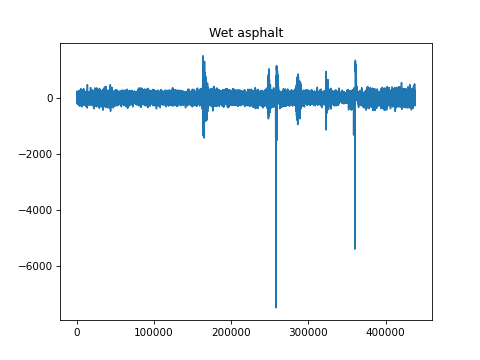

In [18]:
%matplotlib notebook
plt.figure()
plt.plot(s)
plt.title("Wet asphalt")
plt.show()

In [165]:
def get_features(data, surface):
    columns = ["Surface"]
    features = ["RMS", "RMSf", "Spec", "Specf"]

    df = pd.DataFrame(columns = columns)
    for i in range(len(data)):
        df.loc[i, "Surface"] = surface
        r_id = data[i]
        #Read the signals
        sig = read_data(r_id)
        s_f = hpf(sig, fs, 65, 2)
        df.loc[i, "RMS"] = tsfelf.rms(sig)
        df.loc[i, "RMSf"] = tsfelf.rms(s_f)

        df.loc[i, "ZC"] = tsfelf.zero_cross(sig)
        df.loc[i, "ZCf"] = tsfelf.zero_cross(s_f)
        
        df.loc[i, "Spec"] = tsfelf.spectral_centroid(sig, fs)
        df.loc[i, "Specf"] = tsfelf.spectral_centroid(s_f, fs)
        
        
        df.loc[i, "Specslo"] = tsfelf.spectral_slope(sig, fs)
        df.loc[i, "Specslof"] = tsfelf.spectral_slope(s_f, fs) 
        
        
        df.loc[i, "Specspr"] = tsfelf.spectral_spread(sig, fs)
        df.loc[i, "Specsprf"] = tsfelf.spectral_spread(s_f, fs) 
        
        print(i, end=',')
    return df, features
        

In [166]:
waspdf, features = get_features(wasp_files, "Wet Asphalt")

graveldf, _ = get_features(gravel_files, "Gravel")

0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,

C:\Users\Owner\anaconda3\lib\site-packages\tsfel\feature_extraction\features.py:674: RuntimeWarning:

invalid value encountered in sqrt



0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,

In [167]:
alldf = pd.concat([waspdf, graveldf])

alldf

,Surface,RMS,RMSf,ZC,ZCf,Spec,Specf,Specslo,Specslof,Specspr,Specsprf
0,Wet Asphalt,29.546131,1023.227026,7470.0,8387.0,936.116277,1018.407771,-1.136291e-09,-1.127022e-09,1641.800213,1592.380153
1,Wet Asphalt,23.158067,1283.379764,8372.0,9884.0,869.158982,980.920178,-1.143832e-09,-1.131245e-09,1428.056723,1453.218214
2,Wet Asphalt,22.356680,1559.749380,9023.0,10466.0,978.265482,1050.050716,-1.131544e-09,-1.123459e-09,1688.413169,1527.067657
3,Wet Asphalt,18.413845,1917.039422,8206.0,9659.0,868.511381,999.818919,-1.143905e-09,-1.129116e-09,1434.742860,1557.996016
4,Wet Asphalt,17.320115,1903.750157,7371.0,9141.0,845.770818,980.018609,-1.146466e-09,-1.131346e-09,1441.429068,1511.096731
...,...,...,...,...,...,...,...,...,...,...,...
25,Gravel,24.141878,989.295926,11186.0,16171.0,1612.462501,1903.141399,-1.060115e-09,-1.027377e-09,2296.506490,2327.498887
26,Gravel,20.866727,1058.702097,8201.0,13024.0,1337.977433,1664.874924,-1.091030e-09,-1.054212e-09,2117.993202,2237.872168
27,Gravel,22.094076,1109.938163,12740.0,18786.0,1637.921696,1927.347734,-1.057248e-09,-1.024650e-09,2254.784988,2299.299363
28,Gravel,22.777678,1097.721646,10829.0,16163.0,1549.362682,1855.594265,-1.067222e-09,-1.032732e-09,2218.547835,2307.033685


In [145]:
import plotly.express as px
fig = px.box(alldf, x="Surface", y="RMS", points = 'all')
fig.show()

In [146]:
fig = px.box(alldf, x="Surface", y="RMSf", points = 'all')
fig.show()

In [147]:
fig = px.box(alldf, x="Surface", y="Spec", points = 'all')
fig.show()

In [148]:
fig = px.box(alldf, x="Surface", y="Specf", points = 'all')
fig.show()

In [152]:
fig = px.box(alldf, x="Surface", y="Specslo", points = 'all')
fig.show()

In [151]:
fig = px.box(alldf, x="Surface", y="Specslof", points = 'all')
fig.show()

In [155]:
fig = px.box(alldf, x="Surface", y="ZC", points = 'all')
fig.show()

In [154]:
fig = px.box(alldf, x="Surface", y="ZCf", points = 'all')
fig.show()

In [169]:
fig = px.box(alldf, x="Surface", y="Specspr", points = 'all')
fig.show()

In [170]:
fig = px.box(alldf, x="Surface", y="Specsprf", points = 'all')
fig.show()

In [168]:
alldf

,Surface,RMS,RMSf,ZC,ZCf,Spec,Specf,Specslo,Specslof,Specspr,Specsprf
0,Wet Asphalt,29.546131,1023.227026,7470.0,8387.0,936.116277,1018.407771,-1.136291e-09,-1.127022e-09,1641.800213,1592.380153
1,Wet Asphalt,23.158067,1283.379764,8372.0,9884.0,869.158982,980.920178,-1.143832e-09,-1.131245e-09,1428.056723,1453.218214
2,Wet Asphalt,22.356680,1559.749380,9023.0,10466.0,978.265482,1050.050716,-1.131544e-09,-1.123459e-09,1688.413169,1527.067657
3,Wet Asphalt,18.413845,1917.039422,8206.0,9659.0,868.511381,999.818919,-1.143905e-09,-1.129116e-09,1434.742860,1557.996016
4,Wet Asphalt,17.320115,1903.750157,7371.0,9141.0,845.770818,980.018609,-1.146466e-09,-1.131346e-09,1441.429068,1511.096731
...,...,...,...,...,...,...,...,...,...,...,...
25,Gravel,24.141878,989.295926,11186.0,16171.0,1612.462501,1903.141399,-1.060115e-09,-1.027377e-09,2296.506490,2327.498887
26,Gravel,20.866727,1058.702097,8201.0,13024.0,1337.977433,1664.874924,-1.091030e-09,-1.054212e-09,2117.993202,2237.872168
27,Gravel,22.094076,1109.938163,12740.0,18786.0,1637.921696,1927.347734,-1.057248e-09,-1.024650e-09,2254.784988,2299.299363
28,Gravel,22.777678,1097.721646,10829.0,16163.0,1549.362682,1855.594265,-1.067222e-09,-1.032732e-09,2218.547835,2307.033685


# MACHINE LEARNING PART

In [114]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import sklearn
import seaborn as sns
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import recall_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import precision_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn import preprocessing
from sklearn import tree
from sklearn.naive_bayes import GaussianNB

In [171]:
features = ["RMS", "RMSf", "ZC", "ZCf", "Spec", "Specf", "Specslo", "Specslof", "Specspr", "Specsprf"]

In [173]:

# post processing, standardize the data

#remove na values
alldf = alldf.dropna()

scaler = preprocessing.StandardScaler()
# Fit your data on the scaler object

#with these 3 features only, we can get almost perfect score...

alldf[features] = scaler.fit_transform(alldf[features])

alldf

,Surface,RMS,RMSf,ZC,ZCf,Spec,Specf,Specslo,Specslof,Specspr,Specsprf
0,Wet Asphalt,1.095647,-0.946987,-0.442776,-0.737667,-0.424765,-0.543997,-0.424765,-0.543997,-0.285030,-0.450388
1,Wet Asphalt,0.279965,-0.647430,0.036485,-0.160581,-0.686337,-0.670309,-0.686337,-0.670309,-0.981912,-0.889725
2,Wet Asphalt,0.177637,-0.329201,0.382381,0.063777,-0.260108,-0.437378,-0.260108,-0.437378,-0.133055,-0.656581
3,Wet Asphalt,-0.325818,0.082206,-0.051716,-0.247317,-0.688867,-0.606631,-0.688867,-0.606631,-0.960113,-0.558939
4,Wet Asphalt,-0.465475,0.066904,-0.495377,-0.447003,-0.777704,-0.673346,-0.777704,-0.673346,-0.938313,-0.707001
...,...,...,...,...,...,...,...,...,...,...,...
25,Gravel,0.405586,-0.986057,1.531649,2.263025,2.217413,2.437053,2.217413,2.437053,1.849550,1.870398
26,Gravel,-0.012613,-0.906138,-0.054373,1.049873,1.145124,1.634230,1.145124,1.634230,1.267532,1.587445
27,Gravel,0.144105,-0.847142,2.357337,3.271093,2.316870,2.518614,2.316870,2.518614,1.713523,1.781372
28,Gravel,0.231393,-0.861209,1.341964,2.259941,1.970910,2.276846,1.970910,2.276846,1.595377,1.805789


In [174]:
X = alldf[features]
y = alldf["Surface"]

X

,RMS,RMSf,ZC,ZCf,Spec,Specf,Specslo,Specslof,Specspr,Specsprf
0,1.095647,-0.946987,-0.442776,-0.737667,-0.424765,-0.543997,-0.424765,-0.543997,-0.285030,-0.450388
1,0.279965,-0.647430,0.036485,-0.160581,-0.686337,-0.670309,-0.686337,-0.670309,-0.981912,-0.889725
2,0.177637,-0.329201,0.382381,0.063777,-0.260108,-0.437378,-0.260108,-0.437378,-0.133055,-0.656581
3,-0.325818,0.082206,-0.051716,-0.247317,-0.688867,-0.606631,-0.688867,-0.606631,-0.960113,-0.558939
4,-0.465475,0.066904,-0.495377,-0.447003,-0.777704,-0.673346,-0.777704,-0.673346,-0.938313,-0.707001
...,...,...,...,...,...,...,...,...,...,...
25,0.405586,-0.986057,1.531649,2.263025,2.217413,2.437053,2.217413,2.437053,1.849550,1.870398
26,-0.012613,-0.906138,-0.054373,1.049873,1.145124,1.634230,1.145124,1.634230,1.267532,1.587445
27,0.144105,-0.847142,2.357337,3.271093,2.316870,2.518614,2.316870,2.518614,1.713523,1.781372
28,0.231393,-0.861209,1.341964,2.259941,1.970910,2.276846,1.970910,2.276846,1.595377,1.805789


In [175]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0, shuffle=True, stratify=None)

x_train

,RMS,RMSf,ZC,ZCf,Spec,Specf,Specslo,Specslof,Specspr,Specsprf
106,0.640473,-0.586021,2.476886,1.428814,1.561350,1.291089,1.561350,1.291089,1.376438,1.438089
30,0.479794,-0.335936,-0.425242,-0.649003,-0.939213,-0.936567,-0.939213,-0.936567,-1.257011,-1.158839
62,-0.232938,0.053549,-0.844993,-0.881071,-1.114765,-1.035795,-1.114765,-1.035795,-1.176317,-1.135708
89,-1.195851,1.797930,-0.148418,-0.264664,-0.776658,-0.722501,-0.776658,-0.722501,-1.145709,-0.860646
27,0.144105,-0.847142,2.357337,3.271093,2.316870,2.518614,2.316870,2.518614,1.713523,1.781372
...,...,...,...,...,...,...,...,...,...,...
9,1.180280,-1.040197,-1.209486,-1.385298,-1.168446,-1.166695,-1.168446,-1.166695,-0.842189,-0.699617
103,-0.208954,-0.030577,0.873862,0.481653,0.222468,0.063082,0.222468,0.063082,0.223580,-0.029199
67,0.014203,0.228746,-0.768481,-1.041051,-0.293771,-0.325768,-0.293771,-0.325768,-0.157371,-0.047865
9,0.977248,-1.173815,0.269208,0.338249,1.412020,1.033832,1.412020,1.033832,2.398732,1.171033


In [176]:
# KNN

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train, y_train)

y_pred_knn = knn.predict(x_test)



# Extra trees classifier

forestclf = ExtraTreesClassifier(n_estimators = 500)

forestclf.fit(x_train, y_train)

y_pred_forest = forestclf.predict(x_test)


# SVC

#Create a svm Classifier
clf = sklearn.svm.SVC(kernel='linear') 

#Train the model using the training sets
clf.fit(x_train, y_train)

#Predict the response for test dataset
y_pred_svc = clf.predict(x_test)


# Random Forest

rforestclf = RandomForestClassifier(n_estimators = 500)

rforestclf.fit(x_train, y_train)

y_pred_rforest = rforestclf.predict(x_test)


# Decision tree

treeclf = tree.DecisionTreeClassifier()
treeclf = clf.fit(x_train, y_train)
y_pred_tree = rforestclf.predict(x_test)

# Naive bayes

gnb = GaussianNB()
nbclf = gnb.fit(x_train, y_train)
y_pred_nb = nbclf.predict(x_test)

KNN confusion matrix


<IPython.core.display.Javascript object>


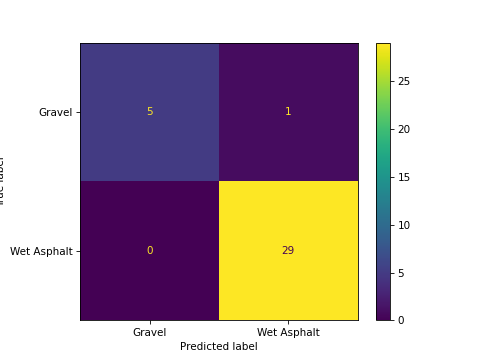

SVC confusion matrix


<IPython.core.display.Javascript object>


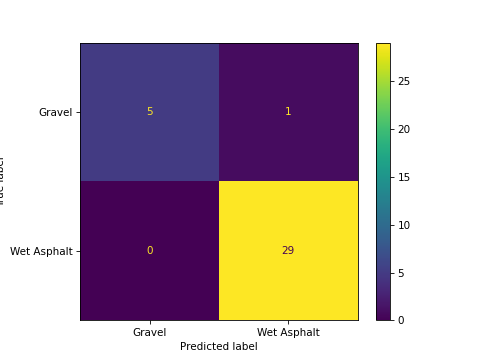

Decision tree classifier confusion matrix


<IPython.core.display.Javascript object>


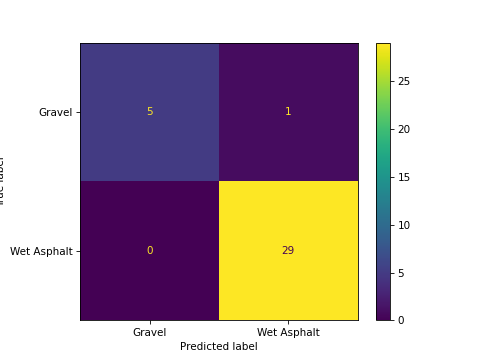

Random forest classifier confusion matrix


<IPython.core.display.Javascript object>


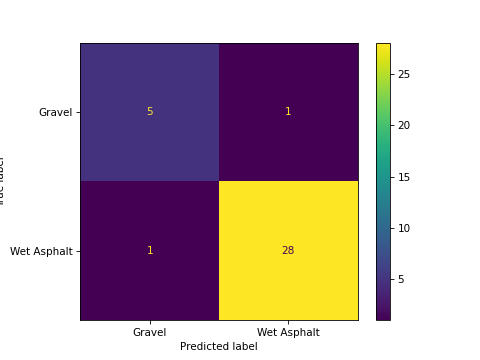

Extra trees classifier confusion matrix


<IPython.core.display.Javascript object>


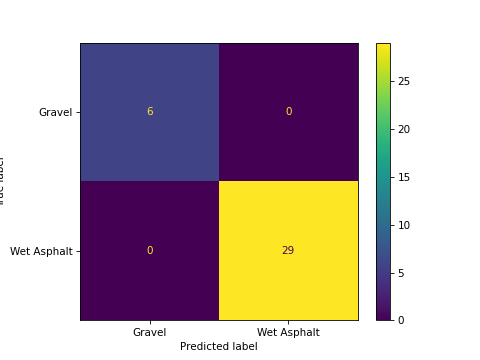

NaiveBayes classifier confusion matrix


<IPython.core.display.Javascript object>


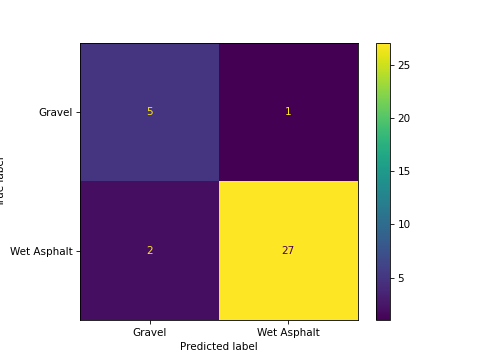

In [177]:
#%matplotlib inline

print("KNN confusion matrix")
plot_confusion_matrix(knn, x_test, y_test)
plt.show()


print("SVC confusion matrix")
plot_confusion_matrix(clf, x_test, y_test)
plt.show()

print("Decision tree classifier confusion matrix")
plot_confusion_matrix(treeclf, x_test, y_test)
plt.show()

print("Random forest classifier confusion matrix")
plot_confusion_matrix(rforestclf, x_test, y_test)
plt.show()

print("Extra trees classifier confusion matrix")
plot_confusion_matrix(forestclf, x_test, y_test)
plt.show()

print("NaiveBayes classifier confusion matrix")
plot_confusion_matrix(nbclf, x_test, y_test)
plt.show()

In [179]:
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
print("Accuracy knn: ", np.round(accuracy_score(y_test, y_pred_knn),2))
print("Accuracy svc: ", np.round(accuracy_score(y_test, y_pred_svc),2))
print("Accuracy Tree : ", np.round(accuracy_score(y_test, y_pred_tree),2))
print("Accuracy Random forest : ", np.round(accuracy_score(y_test, y_pred_rforest),2))
print("Accuracy Extra Trees : ", np.round(accuracy_score(y_test, y_pred_forest),2))

print("----------")

print("Precision knn: ", np.round(precision_score(y_test, y_pred_knn, average='macro'),2))
print("Precision svc: ", np.round(precision_score(y_test, y_pred_svc, average = 'macro'),2))
print("Precision Tree: ", np.round(precision_score(y_test, y_pred_tree, average = 'macro'),2))
print("Precision Random Forest: ", np.round(precision_score(y_test, y_pred_rforest, average = 'macro'),2))
print("Precision trees: ", np.round(precision_score(y_test, y_pred_forest, average = 'macro'),2))

print("----------")

print("Recall knn: ", np.round(recall_score(y_test, y_pred_knn, average = 'macro'),2))
print("Recall svc: ", np.round(recall_score(y_test, y_pred_svc, average = 'macro'),2))     
print("Recall tree: ", np.round(recall_score(y_test, y_pred_tree, average = 'macro'),2))  
print("Recall forest: ", np.round(recall_score(y_test, y_pred_rforest, average = 'macro'),2))     
print("Recall trees: ", np.round(recall_score(y_test, y_pred_forest, average = 'macro'),2)) 

print("----------")
 
print("F1 knn: ", np.round(f1_score(y_test, y_pred_knn, average = 'macro'),2))
print("F1 svc: ", np.round(f1_score(y_test, y_pred_svc, average = 'macro'),2))            
print("F1 tree: ", np.round(f1_score(y_test, y_pred_tree, average = 'macro'),2))  
print("F1 forest: ", np.round(f1_score(y_test, y_pred_rforest, average = 'macro'),2))  

print("F1 trees: ", np.round(f1_score(y_test, y_pred_forest, average = 'macro'),2))  

Accuracy knn:  0.97
Accuracy svc:  0.97
Accuracy Tree :  0.94
Accuracy Random forest :  0.94
Accuracy Extra Trees :  1.0
----------
Precision knn:  0.98
Precision svc:  0.98
Precision Tree:  0.9
Precision Random Forest:  0.9
Precision trees:  1.0
----------
Recall knn:  0.92
Recall svc:  0.92
Recall tree:  0.9
Recall forest:  0.9
Recall trees:  1.0
----------
F1 knn:  0.95
F1 svc:  0.95
F1 tree:  0.9
F1 forest:  0.9
F1 trees:  1.0


In [180]:
model = KNeighborsClassifier(n_neighbors=3)
scores = cross_val_score(model, X, y, scoring='accuracy', cv=LeaveOneOut(), n_jobs=-1)

print('Accuracy knn:', round(np.mean(scores)*100,1), '%')


model = sklearn.svm.SVC(kernel='linear') 
scores = cross_val_score(model, X, y, scoring='accuracy', cv=LeaveOneOut(), n_jobs=-1)

print('Accuracy svc:', round(np.mean(scores)*100,1), '%')


model = tree.DecisionTreeClassifier()
scores = cross_val_score(model, X, y, scoring='accuracy', cv=LeaveOneOut(), n_jobs=-1)
print('Accuracy tree:', round(np.mean(scores)*100,1), '%')


model = RandomForestClassifier(n_estimators = 500)
scores = cross_val_score(model, X, y, scoring='accuracy', cv=LeaveOneOut(), n_jobs=-1)
print('Accuracy forest:', round(np.mean(scores)*100,1), '%')



model = ExtraTreesClassifier(n_estimators = 500)
scores = cross_val_score(model, X, y, scoring='accuracy', cv=LeaveOneOut(), n_jobs=-1)

print('Accuracy extra trees:', round(np.mean(scores)*100,1), '%')

Accuracy knn: 99.3 %
Accuracy svc: 99.3 %
Accuracy tree: 94.9 %
Accuracy forest: 96.4 %
Accuracy extra trees: 97.1 %
